# Data Preprocessing

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv("C:/Users/HARISHKUMAR/Downloads/Train.csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [20]:
df.shape

(8523, 12)

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [22]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []


In [23]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [25]:
df["Item_Weight"].fillna(df["Item_Weight"].mean(), inplace=True)
df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0], inplace=True)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [26]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [27]:
unwantedcolumn=['Item_Identifier','Outlet_Identifier']
df.drop(columns=unwantedcolumn,inplace=True)
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [28]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({
    'low fat':'Low',
    'Low Fat':'Low',
    'LF':'Low',
    'reg':'Regular'
})
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Exploratory Data Analysis:

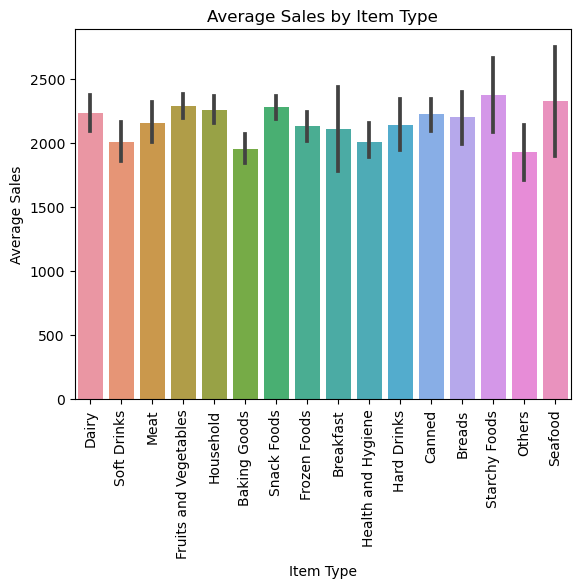

In [29]:
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=df)
plt.title('Average Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Average Sales')
plt.xticks(rotation=90)
plt.show()

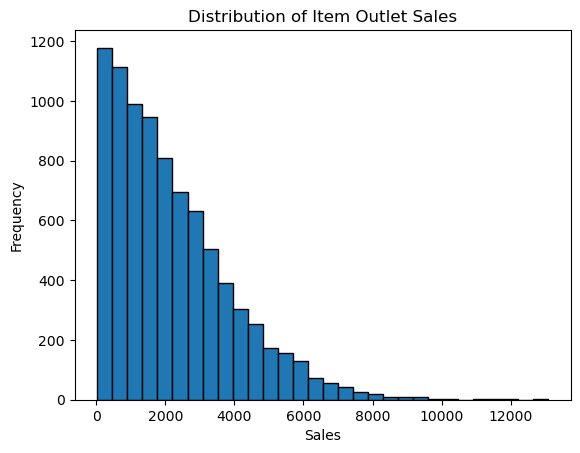

In [30]:
plt.hist(df['Item_Outlet_Sales'], bins=30, edgecolor='k')
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Removing Outliers


In [34]:
upper_limit = df["Item_Outlet_Sales"].mean() + 3*df["Item_Outlet_Sales"].std()
lower_limit = df["Item_Outlet_Sales"].mean() - 3*df["Item_Outlet_Sales"].std()

print("Highest allowed",upper_limit)
print("Lowest allowed",lower_limit)
      
      
df["Item_Outlet_Sales"] = np.where(df["Item_Outlet_Sales"]>upper_limit,upper_limit,
                                   np.where(df["Item_Outlet_Sales"]<lower_limit,lower_limit,df["Item_Outlet_Sales"]))

df["Item_Outlet_Sales"].describe()
                                    

Highest allowed 7152.886602900182
Lowest allowed -2814.757173011671


count    8523.000000
mean     2167.391489
std      1656.172241
min        33.290000
25%       834.247400
50%      1794.331000
75%      3101.296400
max      7152.886603
Name: Item_Outlet_Sales, dtype: float64

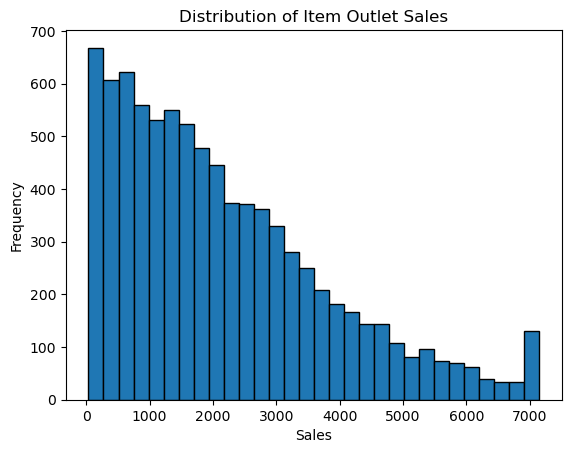

In [35]:
plt.hist(df['Item_Outlet_Sales'], bins=30, edgecolor='k')
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

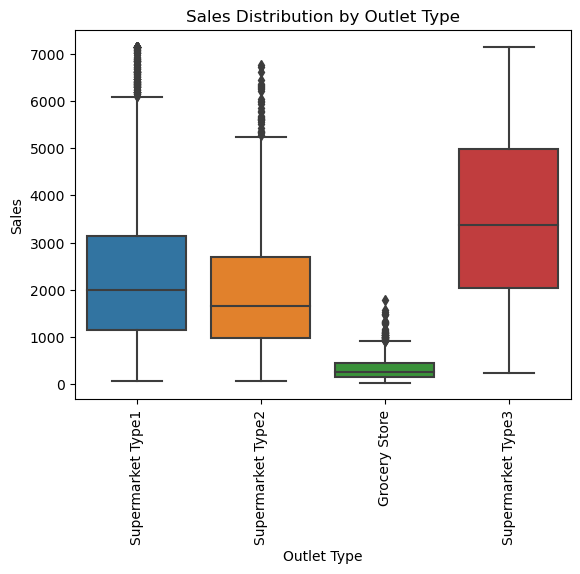

In [36]:
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
plt.title('Sales Distribution by Outlet Type')
plt.xlabel('Outlet Type')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

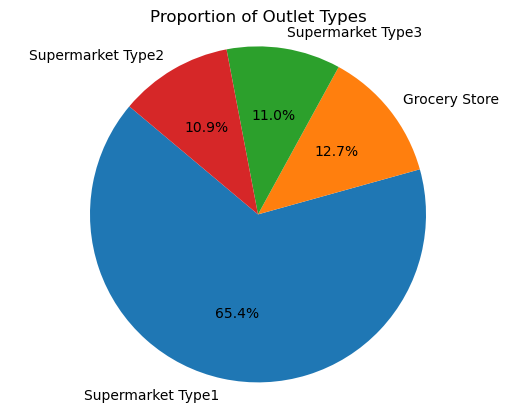

In [37]:
outlet_type_counts = df['Outlet_Type'].value_counts()
plt.pie(outlet_type_counts, labels=outlet_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Outlet Types')
plt.axis('equal')
plt.show()

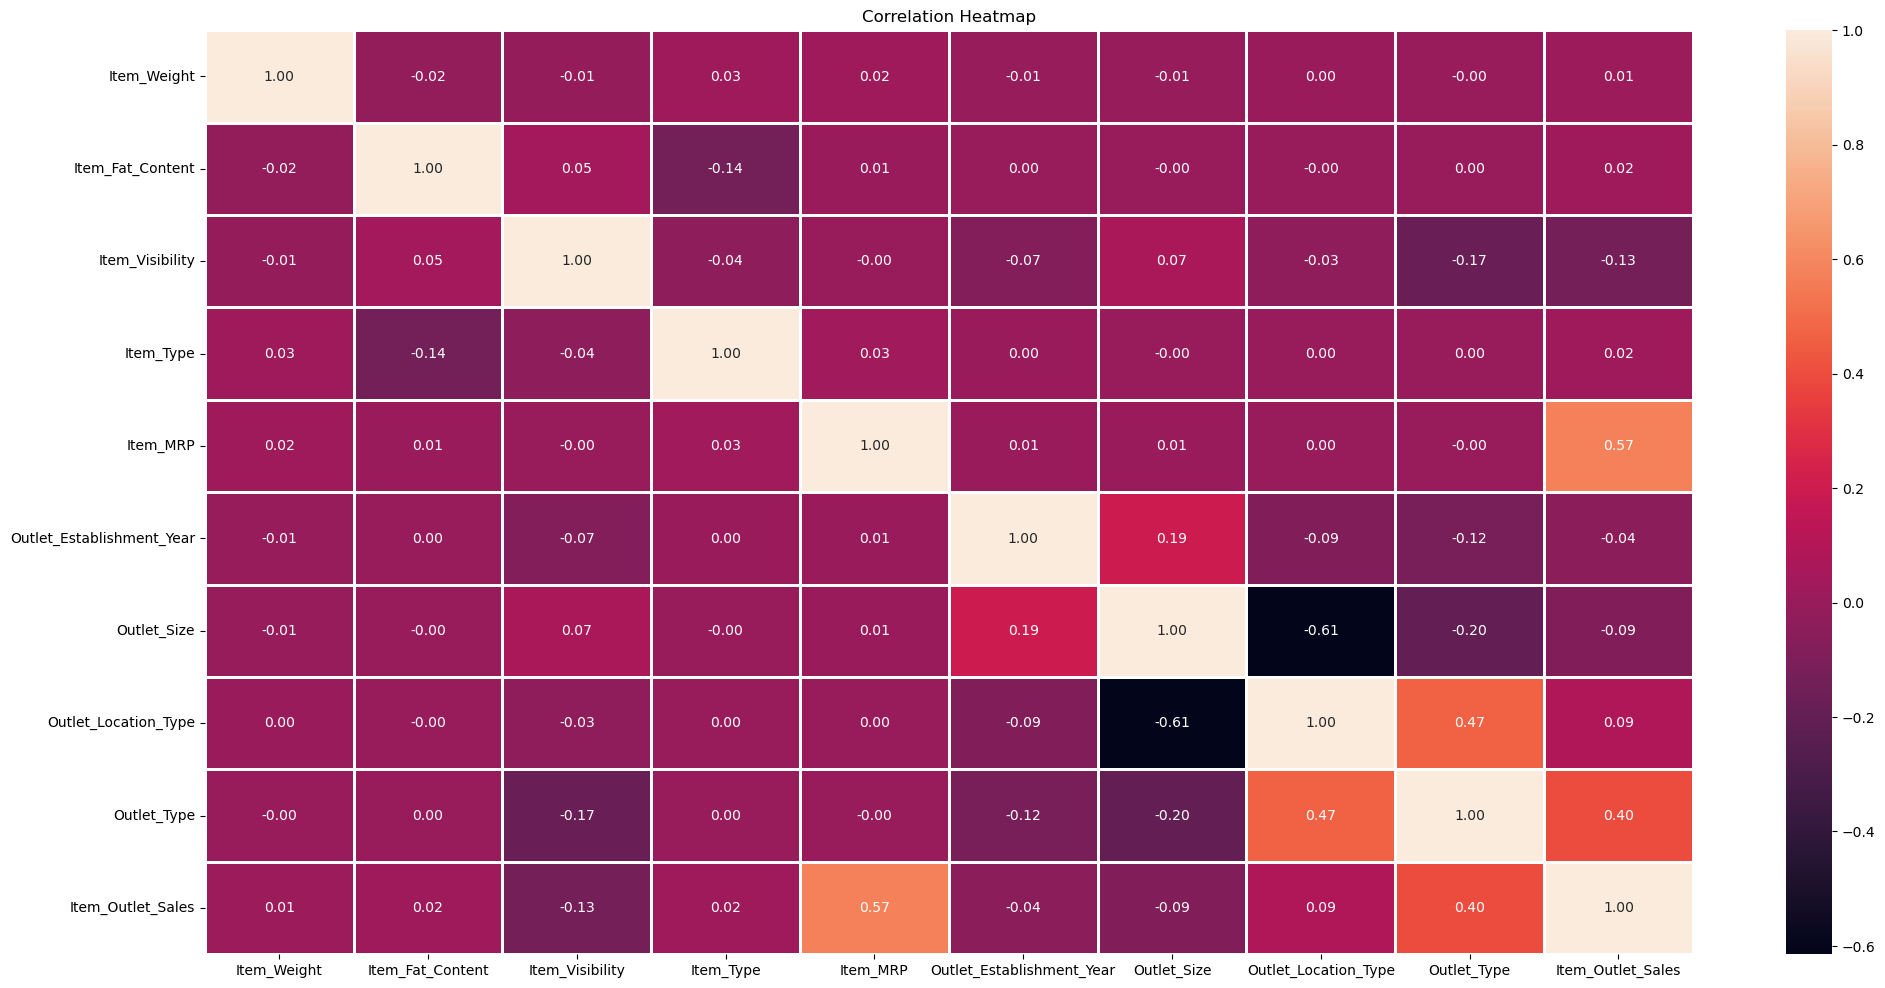

In [39]:
plt.figure(figsize=(24,12)) 
sns.heatmap(df.corr(), annot=True,fmt='.2f', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()

# Model Building:

In [38]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Item_Fat_Content']=label_encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type']=label_encoder.fit_transform(df['Item_Type'])
df['Outlet_Size']=label_encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type']=label_encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']=label_encoder.fit_transform(df['Outlet_Type'])
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.930,0,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,1,0.046982,0,108.1570,2002,1,1,1,549.2850
8520,10.600,0,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,1,0.145221,13,103.1332,2009,1,2,2,1845.5976


In [71]:
# Creating a New Feature
df['Outlet_Age'] = 2024 - df['Outlet_Establishment_Year']

# Split the data into features and target
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [75]:
# Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred_lr = linear_regressor.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression: \n Mean Squared Error: {mse_lr}, R2: {r2_lr}")

Linear Regression: 
 Mean Squared Error: 1370562.326914343, R2: 0.5106870781649296


In [76]:
# Decision Tree Regression
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)
y_pred_tree = tree_regressor.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print(f"Decision Tree Regression: \n Mean Squared Error: {mse_tree}, R2: {r2_tree}")

Decision Tree Regression: 
 Mean Squared Error: 2199476.0321374265, R2: 0.21475147634155478


In [77]:
# Random Forest Regression
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Regression: \n Mean Squared Error: {mse_rf}, R2: {r2_rf}")

Random Forest Regression: 
 Mean Squared Error: 1248170.249470653, R2: 0.5543830297078756


In [73]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [-2.08533062e+00  8.97012399e+01 -1.76568254e+03  1.30179851e+00
  1.57977266e+01 -3.76536072e+12 -3.65299820e+02 -4.34506006e+02
  9.92127875e+02 -3.76536072e+12]
Intercept: 7621090095264360.0
